### import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
data=pd.read_csv('election_results_2024.csv')

In [3]:
data.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


### Party with highest and lowest margin of victory

In [4]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin']=pd.to_numeric(data['Margin'],errors='coerce')

# Party with higest and lowest margin of victory 
highest_margin=data.loc[data['Margin'].idxmax()]
lowest_margin=data.loc[data['Margin'].idxmin()]
print("Higest margin ***********************************\n",highest_margin)

Higest margin ***********************************
 Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                  1175092.0
Status                            Result Declared
Name: 221, dtype: object


In [5]:
print("Lowest margin ***********************************\n",lowest_margin)

Lowest margin ***********************************
 Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                 48.0
Status                                      Result Declared
Name: 357, dtype: object


### Plot number of seats won by each party

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6204\1631058238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index,y=seats_won.values,palette='viridis')


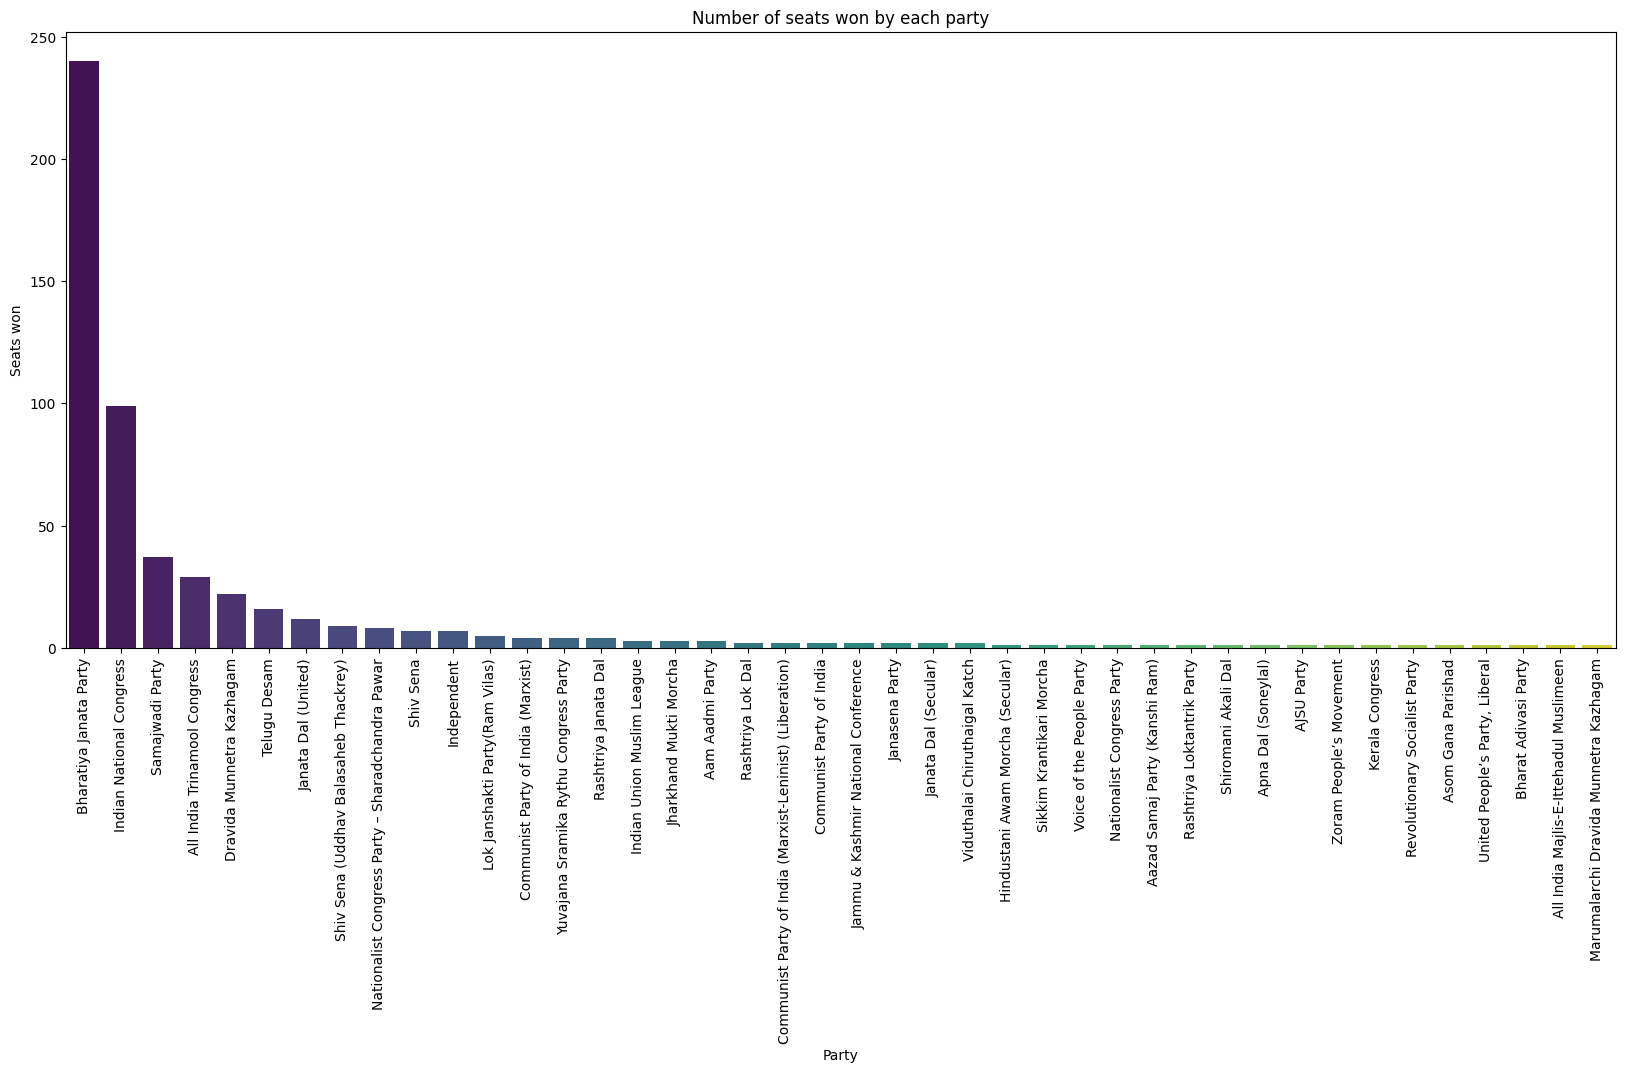

In [6]:
leading_party_highest_votes=party_votes.idxmax()
leading_party_lowest_votes=party_votes.idxmin()

seats_won=data['Leading Party'].value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=seats_won.index,y=seats_won.values,palette='viridis')

plt.title("Number of seats won by each party")
plt.xlabel('Party')
plt.ylabel('Seats won')
plt.xticks(rotation=90)
plt.show()

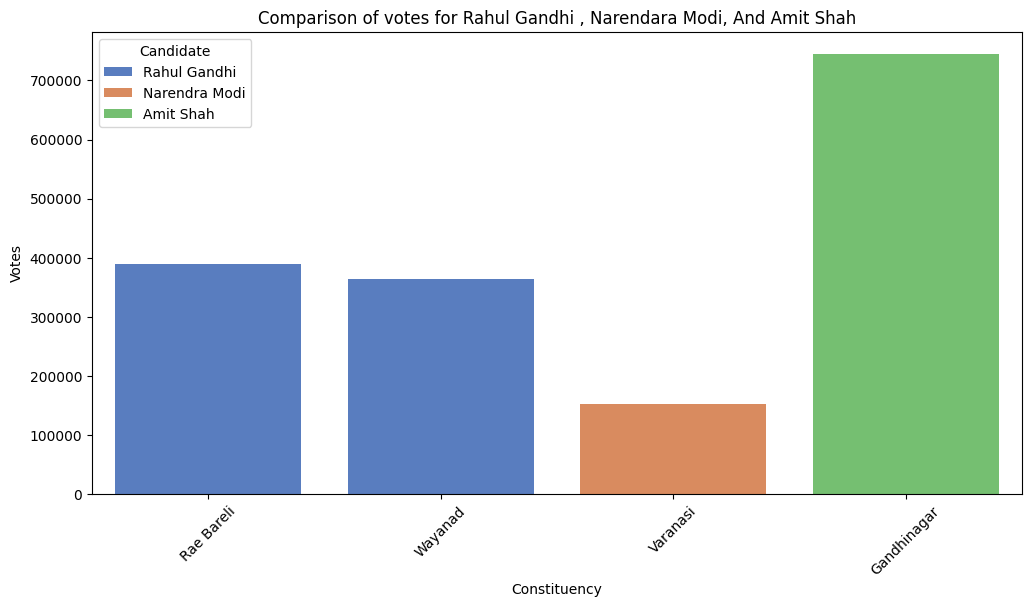

In [7]:
rahul_entries=data[data['Leading Candidate']=='RAHUL GANDHI']
modi_entries=data[data['Leading Candidate']=='NARENDRA MODI']
amit_entries=data[data['Leading Candidate']=='AMIT SHAH']

# get the botes for rahul gandhi , narendra modi , and amit shaha
rahul_votes=rahul_entries['Margin'].values
modi_votes=modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes=amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# get the original constituency names for rahul gandhi
rahul_constituencies =list(rahul_entries['Constituency'])

# get the original constituency name for narendra modi
modi_constituency=modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modhi Constituency"

# get the original consituency name for amit shaha
amit_constituency=amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# combine the data
data_to_plot=pd.DataFrame({
    'Candidate':['Rahul Gandhi']* len(rahul_votes)+['Narendra Modi','Amit Shah'],
    'Constituency':rahul_constituencies+[modi_constituency,amit_constituency],
    'Votes':list(rahul_votes)+[modi_votes,amit_votes]
})

# plot the comparison
plt.figure(figsize=(12,6))
sns.barplot(data=data_to_plot,x='Constituency',y='Votes',hue='Candidate',palette='muted')
plt.title('Comparison of votes for Rahul Gandhi , Narendara Modi, And Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

### Highest and lowest victory candidate

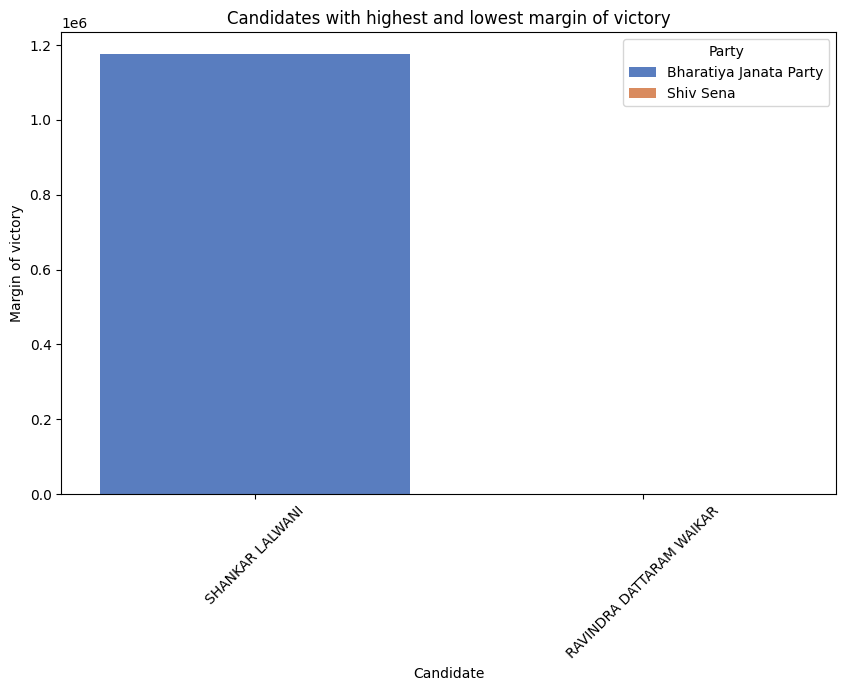

In [8]:
highest_margin_entry=data.loc[data['Margin'].idxmax()]
lowest_margin_entry=data.loc[data['Margin'].idxmin()]

# combine the data 
data_to_plot=pd.DataFrame({
    'Candidate':[highest_margin_entry['Leading Candidate'],lowest_margin_entry['Leading Candidate']],
    'Party':[highest_margin_entry['Leading Party'] ,lowest_margin_entry['Leading Party']],
    'Margin':[highest_margin_entry['Margin'],lowest_margin_entry['Margin']]
})

# plot the comparison
plt.figure(figsize=(10,6))
sns.barplot(data=data_to_plot,x='Candidate',y='Margin',hue='Party',palette='muted')
plt.title('Candidates with highest and lowest margin of victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of victory')
plt.xticks(rotation=45)
plt.show()

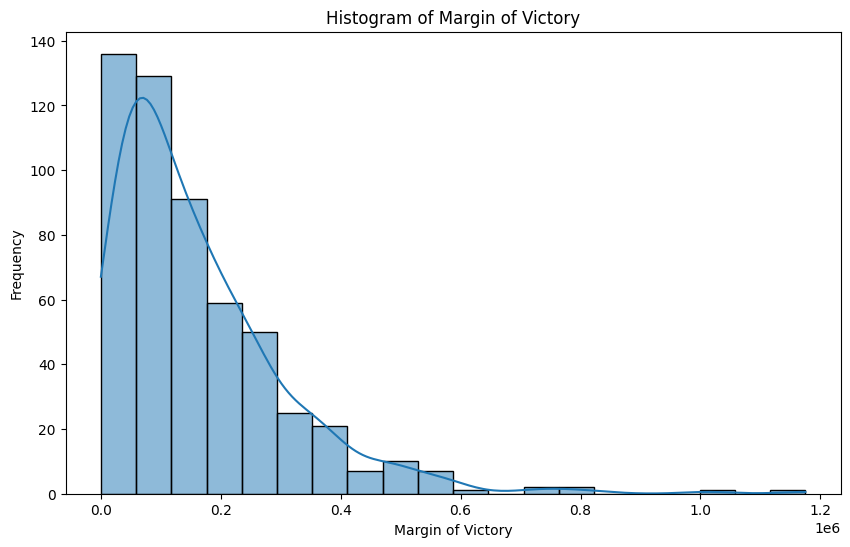

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data['Margin'],bins=20,kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

### votes distribution by party

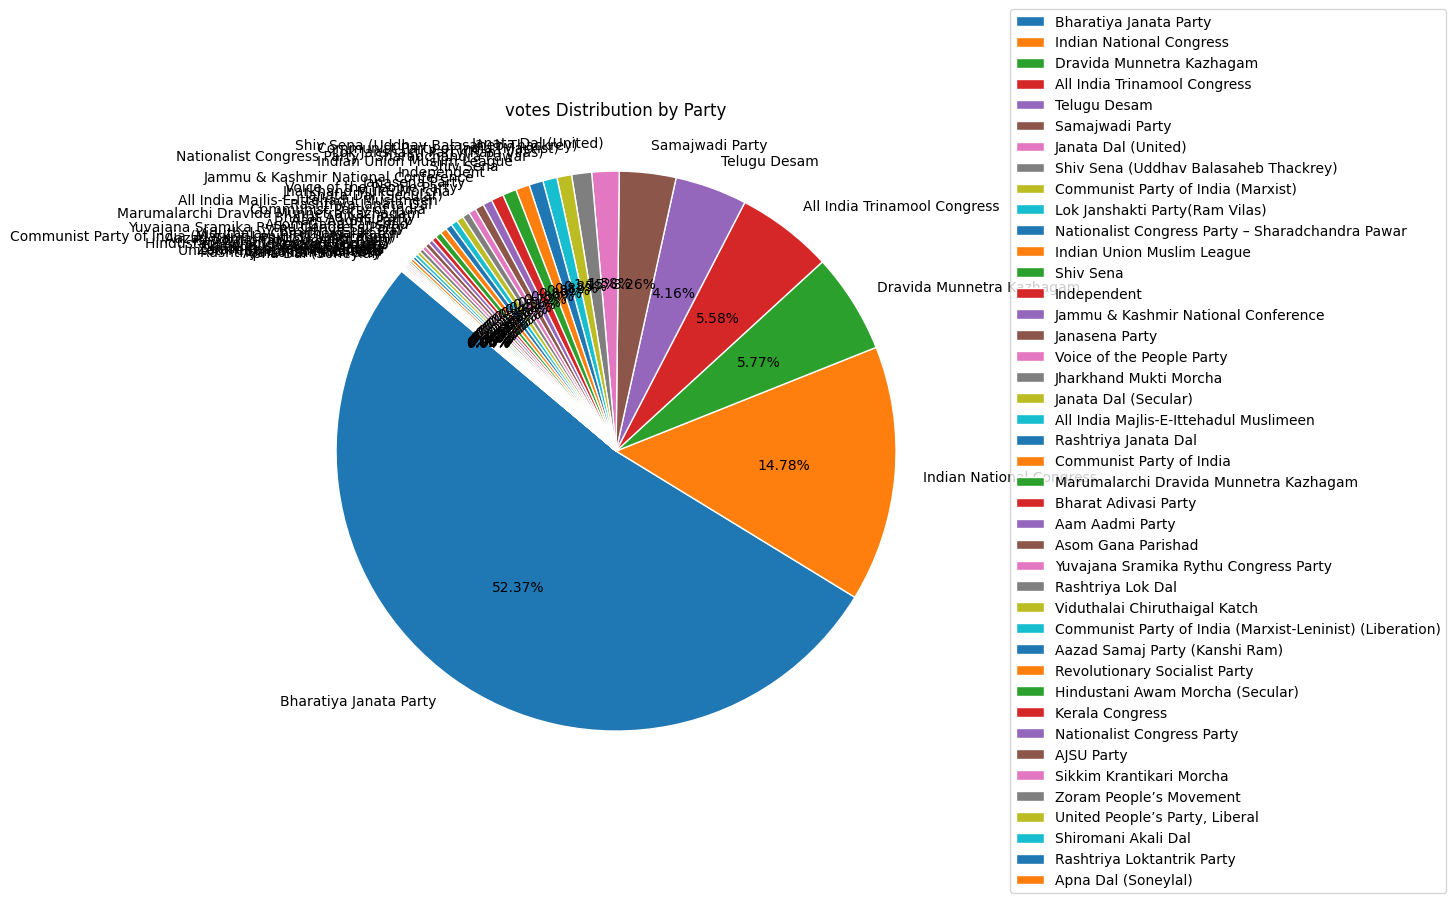

In [10]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
# plot pie chart 
plt.figure(figsize=(10,8))
wedges,texts,autotexts=plt.pie(party_votes,labels=party_votes.index,autopct='%1.2f%%',startangle=140,wedgeprops=dict(edgecolor='w'))
plt.title('votes Distribution by Party',pad=20)
plt.axis('equal')
plt.legend(labels=party_votes.index,loc='center left',bbox_to_anchor=(1,0.5),fontsize='medium')
plt.show()

### Top 10 Trailing party by vote

In [11]:
trailing_party_votes=data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats=data['Trailing Party'].value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6204\1195336494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

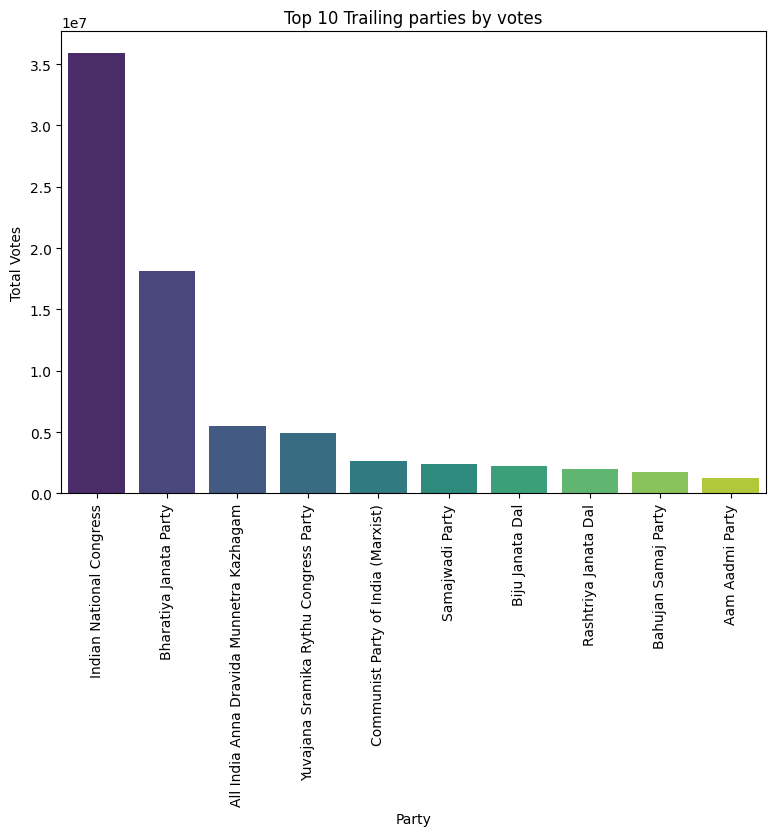

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes[:10],palette='viridis')
plt.title('Top 10 Trailing parties by votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6204\1163899916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10],y=trailing_party_seats.values[:10],palette='viridis')


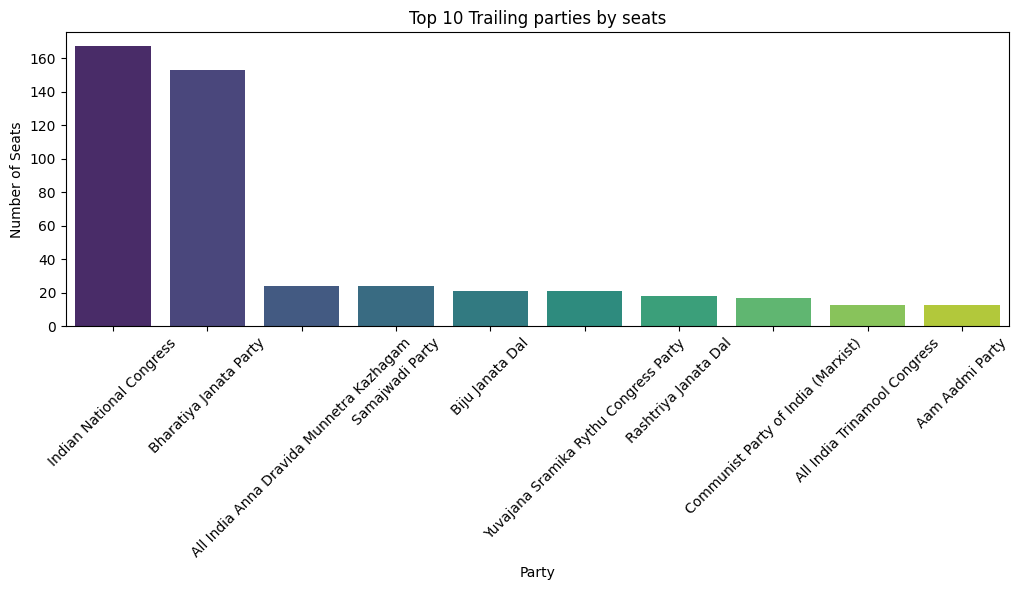

In [13]:
### Top 10 Trailing Party by seat
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.barplot(x=trailing_party_seats.index[:10],y=trailing_party_seats.values[:10],palette='viridis')
plt.title('Top 10 Trailing parties by seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()